In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

file_path = "data/microdados_enem_2016_coma.csv"

cols = [
    "NU_INSCRICAO", "SG_UF_RESIDENCIA", "TP_ANO_CONCLUIU",
    "NU_IDADE", "TP_SEXO", "TP_COR_RACA",
    "TP_ESCOLA", "TP_DEPENDENCIA_ADM_ESC", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5",
    "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO",
    "Q001", "Q002", "Q005", "Q006"
]

chunks = []
chunksize = 100_000

for chunk in pd.read_csv(
    file_path,
    sep=",",
    encoding="latin1",
    on_bad_lines="skip",
    low_memory=False,
    chunksize=chunksize
):
    available_cols = [c for c in cols if c in chunk.columns]
    chunk = chunk[available_cols]
    chunks.append(chunk)
    print(f"Chunk lido: {len(chunk)} linhas")

df = pd.concat(chunks, ignore_index=True)

print("Dados carregados:", df.shape)
df = df.dropna(subset=["NU_NOTA_MT", "NU_NOTA_REDACAO", "NU_NOTA_CH"])
print("Shape pós-limpeza:", df.shape)

df.to_csv("data/enem2016_socioeconomico.csv", index=False, encoding="utf-8")

print("✅ Arquivo salvo: enem2016_socioeconomico.csv")


Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 

In [2]:
df = pd.read_csv("data/enem2016_socioeconomico.csv")
print("Colunas disponíveis:", df.columns.tolist())


Colunas disponíveis: ['NU_INSCRICAO', 'SG_UF_RESIDENCIA', 'TP_ANO_CONCLUIU', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'TP_DEPENDENCIA_ADM_ESC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q005', 'Q006']


In [3]:
# Dicionário de renomeação das colunas
rename_dict = {
    "NU_INSCRICAO": "inscricao",
    "SG_UF_RESIDENCIA": "uf_residencia",
    "TP_ANO_CONCLUIU": "ano_conclusao",
    "NU_IDADE": "idade",
    "TP_SEXO": "sexo",
    "TP_COR_RACA": "cor_raca",
    "TP_ESCOLA": "tipo_escola",
    "TP_DEPENDENCIA_ADM_ESC": "dependencia_escola",
    "NU_NOTA_COMP1": "nota_dominio_linguagem",
    "NU_NOTA_COMP2": "nota_compreensao_tema", 
    "NU_NOTA_COMP3": "nota_coesao_coerencia",    
    "NU_NOTA_COMP4": "nota_argumentacao",            
    "NU_NOTA_COMP5": "nota_proposta_intervencao",
    "NU_NOTA_CN": "nota_ciencias_natureza",
    "NU_NOTA_CH": "nota_ciencias_humanas",
    "NU_NOTA_LC": "nota_linguagens",
    "NU_NOTA_MT": "nota_matematica",
    "NU_NOTA_REDACAO": "nota_redacao",
    "Q001": "escolaridade_pai",
    "Q002": "escolaridade_mae",
    "Q005": "numero_moradores",
    "Q006": "renda_familiar"
}

# Aplicar renomeação
df.rename(columns=rename_dict, inplace=True)

print("Novos nomes de colunas:")
print(df.columns.tolist())

Novos nomes de colunas:
['inscricao', 'uf_residencia', 'ano_conclusao', 'idade', 'sexo', 'cor_raca', 'tipo_escola', 'dependencia_escola', 'nota_dominio_linguagem', 'nota_compreensao_tema', 'nota_coesao_coerencia', 'nota_argumentacao', 'nota_proposta_intervencao', 'nota_ciencias_natureza', 'nota_ciencias_humanas', 'nota_linguagens', 'nota_matematica', 'nota_redacao', 'escolaridade_pai', 'escolaridade_mae', 'numero_moradores', 'renda_familiar']


In [4]:

# Cor ou raça
map_cor_raca = {
    0: "Não declarado",
    1: "Branca",
    2: "Preta",
    3: "Parda",
    4: "Amarela",
    5: "Indígena"
}

# Tipo de escola (em que o participante estudou)
map_tipo_escola = {
    1: "Não respondeu",
    2: "Pública",
    3: "Privada"
}

# Dependência administrativa da escola
map_dependencia_escola = {
    1: "Federal",
    2: "Estadual",
    3: "Municipal",
    4: "Privada"
}

# Escolaridade do pai (Q001)
map_escolaridade_pai = {
    "A": "Nunca estudou",
    "B": "Não completou o Ensino Fundamental",
    "C": "Completou o Ensino Fundamental",
    "D": "Completou o Ensino Médio",
    "E": "Completou o Ensino Superior",
    "F": "Pós-graduação",
    "G": "Não sei"
}

# Escolaridade da mãe (Q002)
map_escolaridade_mae = {
    "A": "Nunca estudou",
    "B": "Não completou o Ensino Fundamental",
    "C": "Completou o Ensino Fundamental",
    "D": "Completou o Ensino Médio",
    "E": "Completou o Ensino Superior",
    "F": "Pós-graduação",
    "G": "Não sei"
}

# Renda familiar (Q006)
map_renda_familiar = {
    "A": "Até R$ 980,00",
    "B": "De R$ 981 a R$ 1.470",
    "C": "De R$ 1.471 a R$ 1.960",
    "D": "De R$ 1.961 a R$ 2.940",
    "E": "De R$ 2.941 a R$ 3.920",
    "F": "De R$ 3.921 a R$ 4.900",
    "G": "De R$ 4.901 a R$ 5.880",
    "H": "De R$ 5.881 a R$ 6.860",
    "I": "De R$ 6.861 a R$ 7.840",
    "J": "De R$ 7.841 a R$ 8.820",
    "K": "De R$ 8.821 a R$ 9.800",
    "L": "De R$ 9.801 a R$ 11.760",
    "M": "De R$ 11.761 a R$ 14.700",
    "N": "De R$ 14.701 a R$ 19.600",
    "O": "De R$ 19.601 a R$ 24.500",
    "P": "Mais de R$ 24.501"
}

df["cor_raca"] = df["cor_raca"].map(map_cor_raca)
df["tipo_escola"] = df["tipo_escola"].map(map_tipo_escola)
df["dependencia_escola"] = df["dependencia_escola"].map(map_dependencia_escola)
df["escolaridade_pai"] = df["escolaridade_pai"].map(map_escolaridade_pai)
df["escolaridade_mae"] = df["escolaridade_mae"].map(map_escolaridade_mae)
df["renda_familiar"] = df["renda_familiar"].map(map_renda_familiar)

df[["sexo", "cor_raca", "tipo_escola", "dependencia_escola", 
    "escolaridade_pai", "escolaridade_mae", 
    "numero_moradores", "renda_familiar"]].head()


,sexo,cor_raca,tipo_escola,dependencia_escola,escolaridade_pai,escolaridade_mae,numero_moradores,renda_familiar
0,M,Parda,Não respondeu,NaN,Completou o Ensino Superior,Completou o Ensino Superior,2.0,De R$ 981 a R$ 1.470
1,M,Branca,Não respondeu,NaN,NaN,NaN,5.0,De R$ 1.961 a R$ 2.940
2,M,Parda,Não respondeu,NaN,Não completou o Ensino Fundamental,Completou o Ensino Superior,3.0,De R$ 1.961 a R$ 2.940
3,M,Branca,Não respondeu,NaN,Completou o Ensino Superior,Completou o Ensino Superior,5.0,De R$ 981 a R$ 1.470
4,M,Parda,Não respondeu,NaN,NaN,Não completou o Ensino Fundamental,3.0,De R$ 981 a R$ 1.470


In [5]:
num_vars = [
    "idade",
    "nota_ciencias_natureza",
    "nota_ciencias_humanas",
    "nota_linguagens",
    "nota_matematica",
    "nota_redacao",
    'nota_dominio_linguagem',
    'nota_compreensao_tema',
    'nota_coesao_coerencia',
    'nota_argumentacao',
    'nota_proposta_intervencao'
]

print("Variáveis numéricas usadas:", num_vars)


Variáveis numéricas usadas: ['idade', 'nota_ciencias_natureza', 'nota_ciencias_humanas', 'nota_linguagens', 'nota_matematica', 'nota_redacao', 'nota_dominio_linguagem', 'nota_compreensao_tema', 'nota_coesao_coerencia', 'nota_argumentacao', 'nota_proposta_intervencao']


In [6]:
def resumo_univariado(df, cols):
    linhas = []
    for col in cols:
        serie = df[col].dropna()
        moda = serie.mode()
        moda_val = moda.iloc[0] if not moda.empty else np.nan

        linhas.append({
            "variavel": col,
            "n": len(serie),
            "media": serie.mean(),
            "mediana": serie.median(),
            "moda": moda_val,
            "desvio_padrao": serie.std(),
            "p25": serie.quantile(0.25),
            "p50": serie.quantile(0.50),
            "p75": serie.quantile(0.75),
            "max": serie.max()
        })
    return pd.DataFrame(linhas)

resumo = resumo_univariado(df, num_vars)
resumo.round(2)


,variavel,n,media,mediana,moda,desvio_padrao,p25,p50,p75,max
0,idade,5814885,21.80,19.0,17.0,7.36,17.0,19.0,23.0,92.0
1,nota_ciencias_natureza,5814955,478.41,463.8,441.3,72.69,422.5,463.8,523.7,871.3
2,nota_ciencias_humanas,5814955,535.35,538.2,549.9,74.13,485.7,538.2,587.1,859.1
3,nota_linguagens,5814955,521.06,525.2,536.8,68.65,474.4,525.2,569.4,802.6
4,nota_matematica,5814955,490.25,468.2,423.5,103.19,412.9,468.2,549.2,991.5
5,nota_redacao,5814955,530.37,540.0,560.0,153.75,440.0,540.0,600.0,1000.0
6,nota_dominio_linguagem,5814955,120.32,120.0,120.0,29.48,120.0,120.0,140.0,200.0
7,nota_compreensao_tema,5814955,112.19,120.0,120.0,33.79,100.0,120.0,120.0,200.0
8,nota_coesao_coerencia,5814955,107.28,120.0,120.0,34.29,80.0,120.0,120.0,200.0
9,nota_argumentacao,5814955,113.48,120.0,120.0,33.34,100.0,120.0,120.0,200.0


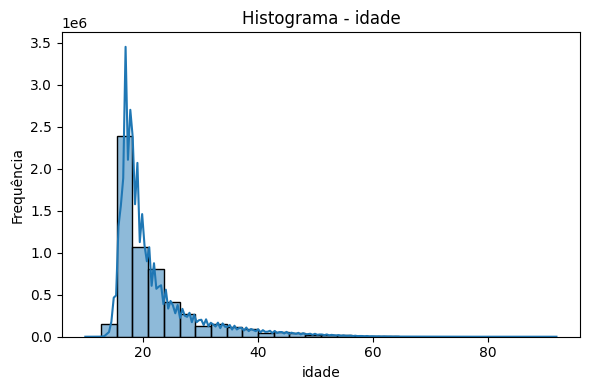

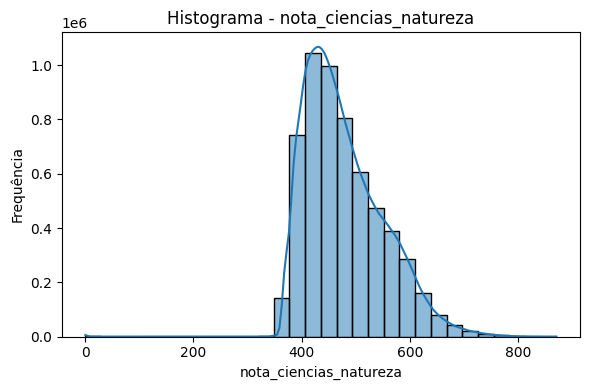

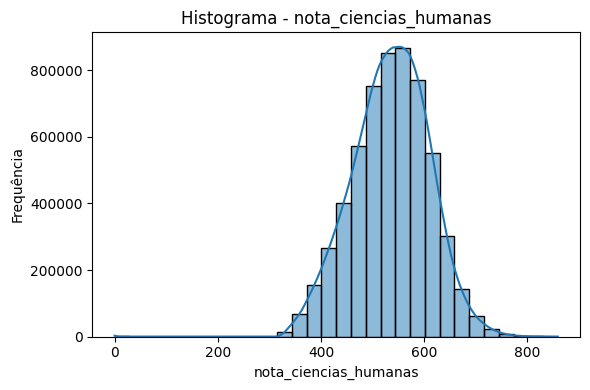

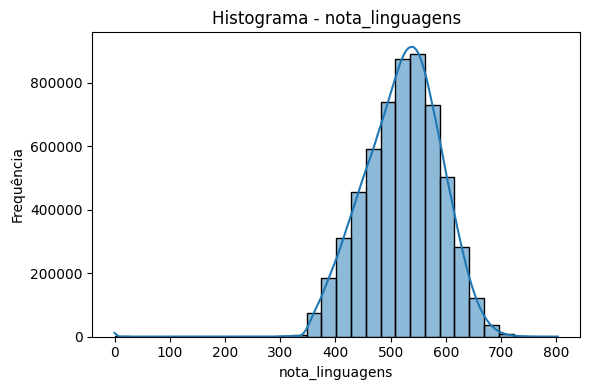

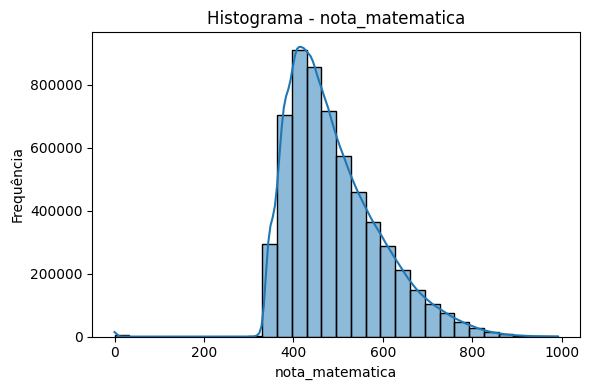

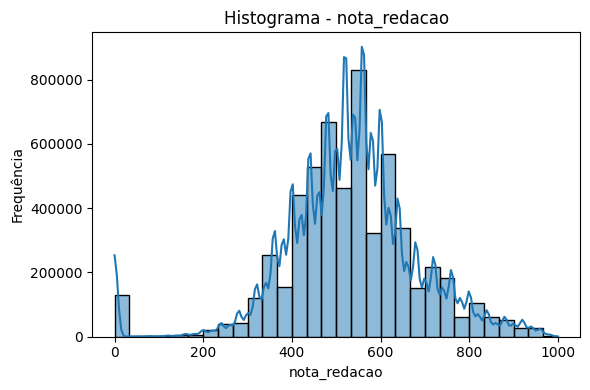

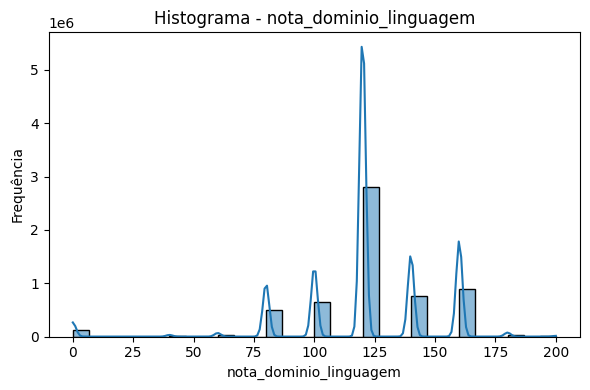

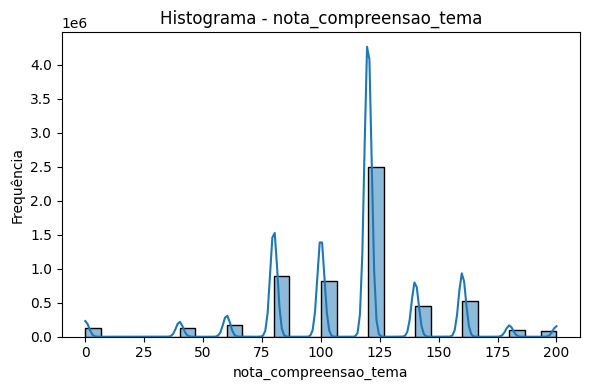

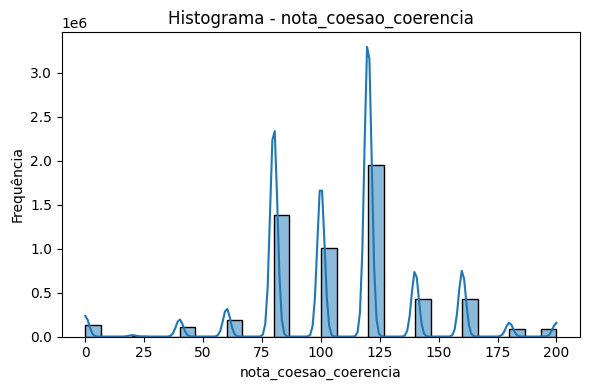

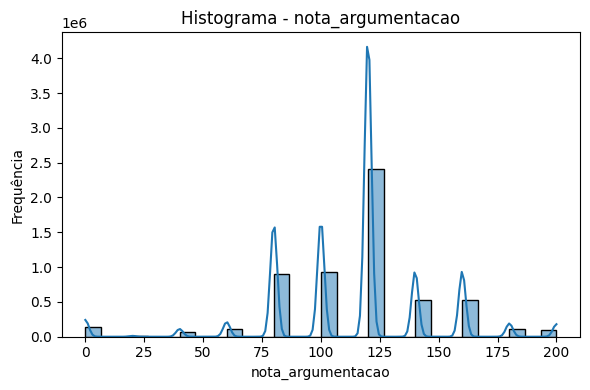

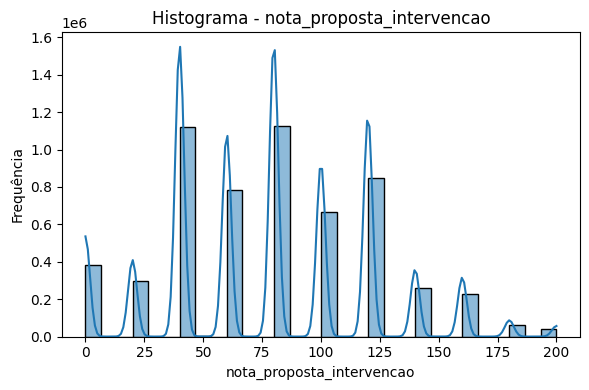

In [7]:
for col in num_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Histograma - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()


Matriz de correlação (notas x fatores sociais):


,sexo_num,renda_familiar_num,numero_moradores,tipo_escola_num,dep_Estadual,dep_Federal,dep_Municipal,dep_Privada,cor_Amarela,cor_Branca,cor_Indígena,cor_Parda,cor_Preta
nota_ciencias_natureza,-0.129,0.397,-0.090,0.419,-0.447,0.152,-0.011,0.419,0.005,0.173,-0.027,-0.129,-0.066
nota_ciencias_humanas,-0.076,0.354,-0.101,0.355,-0.380,0.132,-0.009,0.355,-0.002,0.178,-0.031,-0.143,-0.046
nota_linguagens,-0.011,0.336,-0.103,0.319,-0.340,0.112,-0.005,0.319,-0.001,0.187,-0.032,-0.145,-0.056
nota_matematica,-0.185,0.399,-0.084,0.377,-0.406,0.145,-0.007,0.377,0.006,0.192,-0.026,-0.141,-0.076
nota_redacao,0.093,0.299,-0.078,0.342,-0.362,0.119,-0.016,0.342,0.002,0.137,-0.030,-0.099,-0.049



Top 8 correlações para nota_ciencias_natureza:


dep_Estadual         -0.447
dep_Privada           0.419
tipo_escola_num       0.419
renda_familiar_num    0.397
cor_Branca            0.173
dep_Federal           0.152
sexo_num             -0.129
cor_Parda            -0.129
Name: nota_ciencias_natureza, dtype: float64


Top 8 correlações para nota_ciencias_humanas:


dep_Estadual         -0.380
dep_Privada           0.355
tipo_escola_num       0.355
renda_familiar_num    0.354
cor_Branca            0.178
cor_Parda            -0.143
dep_Federal           0.132
numero_moradores     -0.101
Name: nota_ciencias_humanas, dtype: float64


Top 8 correlações para nota_linguagens:


dep_Estadual         -0.340
renda_familiar_num    0.336
dep_Privada           0.319
tipo_escola_num       0.319
cor_Branca            0.187
cor_Parda            -0.145
dep_Federal           0.112
numero_moradores     -0.103
Name: nota_linguagens, dtype: float64


Top 8 correlações para nota_matematica:


dep_Estadual         -0.406
renda_familiar_num    0.399
dep_Privada           0.377
tipo_escola_num       0.377
cor_Branca            0.192
sexo_num             -0.185
dep_Federal           0.145
cor_Parda            -0.141
Name: nota_matematica, dtype: float64


Top 8 correlações para nota_redacao:


dep_Estadual         -0.362
dep_Privada           0.342
tipo_escola_num       0.342
renda_familiar_num    0.299
cor_Branca            0.137
dep_Federal           0.119
cor_Parda            -0.099
sexo_num              0.093
Name: nota_redacao, dtype: float64

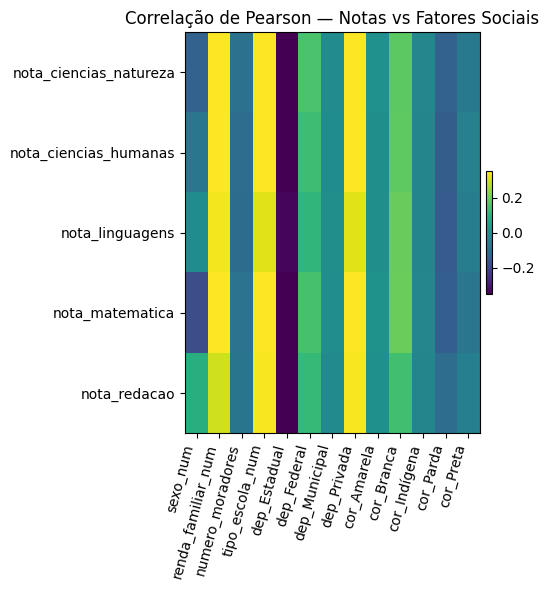


Média da renda_familiar_num (R$): 3359.13

Correlação de Pearson entre renda familiar (numérica) e cada nota:
nota_ciencias_natureza    0.371
nota_ciencias_humanas     0.330
nota_linguagens           0.310
nota_matematica           0.364
nota_redacao              0.274
Name: renda_familiar_num, dtype: float64

Pearson (nota_matematica x renda_familiar_num): 0.364


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_pearson = df.copy()

map_sexo = {"F": 1, "M": 0}
df_pearson["sexo_num"] = df_pearson["sexo"].map(map_sexo)

esc_levels = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": np.nan}
df_pearson["escolaridade_pai_num"] = df_pearson["escolaridade_pai"].map(esc_levels)
df_pearson["escolaridade_mae_num"] = df_pearson["escolaridade_mae"].map(esc_levels)

renda_mid = {
    "Até R$ 980,00": 490,
    "De R$ 981 a R$ 1.470": 1226,
    "De R$ 1.471 a R$ 1.960": 1716,
    "De R$ 1.961 a R$ 2.940": 2450,
    "De R$ 2.941 a R$ 3.920": 3430,
    "De R$ 3.921 a R$ 4.900": 4410,
    "De R$ 4.901 a R$ 5.880": 5390,
    "De R$ 5.881 a R$ 6.860": 6370,
    "De R$ 6.861 a R$ 7.840": 7350,
    "De R$ 7.841 a R$ 8.820": 8330,
    "De R$ 8.821 a R$ 9.800": 9310,
    "De R$ 9.801 a R$ 11.760": 10780,
    "De R$ 11.761 a R$ 14.700": 13230,
    "De R$ 14.701 a R$ 19.600": 17150,
    "De R$ 19.601 a R$ 24.500": 22050,
    "Mais de R$ 24.501": 27250  # assumindo teto ~R$ 30k
}
df_pearson["renda_familiar_num"] = df_pearson["renda_familiar"].map(renda_mid)

# d) Tipo de escola: pública x privada
map_tipo_escola_num = {"Pública": 0, "Privada": 1}
df_pearson["tipo_escola_num"] = df_pearson["tipo_escola"].map(map_tipo_escola_num)

# e) Dependência administrativa: one-hot
dep_dummies = pd.get_dummies(df_pearson["dependencia_escola"], prefix="dep", dummy_na=False)

# f) Cor/raça: one-hot
cor_validas = ["Branca", "Preta", "Parda", "Amarela", "Indígena"]
cor_series = df_pearson["cor_raca"].where(df_pearson["cor_raca"].isin(cor_validas), np.nan)
cor_dummies = pd.get_dummies(cor_series, prefix="cor", dummy_na=False)

# g) Número de moradores
df_pearson["numero_moradores"] = pd.to_numeric(df_pearson["numero_moradores"], errors="coerce")

# ----------------------------
# 2) MATRIZ PARA CORRELAÇÃO GERAL
# ----------------------------

targets = [
    "nota_ciencias_natureza",
    "nota_ciencias_humanas",
    "nota_linguagens",
    "nota_matematica",
    "nota_redacao",
]

sociais_num = [
    "sexo_num",
    "escolaridade_pai_num",
    "escolaridade_mae_num",
    "renda_familiar_num",
    "numero_moradores",
    "tipo_escola_num",
]

X_sociais = pd.concat([df_pearson[sociais_num], dep_dummies, cor_dummies], axis=1)
X_sociais = X_sociais.dropna(how="all", axis=1)

base = pd.concat([df_pearson[targets], X_sociais], axis=1).dropna()

corr = base[targets + list(X_sociais.columns)].corr(method="pearson")
corr_sel = corr.loc[targets, X_sociais.columns]

print("Matriz de correlação (notas x fatores sociais):")
display(corr_sel.round(3))

# ----------------------------
# 3) RANKING DOS FATORES (por nota)
# ----------------------------
def top_fatores_por_nota(corr_matrix, k=8):
    for y in corr_matrix.index:
        s = corr_matrix.loc[y].dropna()
        top = s.reindex(s.abs().sort_values(ascending=False).index)[:k]
        print(f"\nTop {k} correlações para {y}:")
        display(top.round(3))

top_fatores_por_nota(corr_sel, k=8)

# ----------------------------
# 4) HEATMAP SIMPLES
# ----------------------------
plt.figure(figsize=(min(18, 1 + 0.35*len(corr_sel.columns)), 6))
im = plt.imshow(corr_sel.values, aspect="auto", vmin=-0.35, vmax=0.35)
plt.colorbar(im, fraction=0.02, pad=0.02)
plt.yticks(range(len(corr_sel.index)), corr_sel.index)
plt.xticks(range(len(corr_sel.columns)), corr_sel.columns, rotation=75, ha="right")
plt.title("Correlação de Pearson — Notas vs Fatores Sociais")
plt.tight_layout()
plt.show()

# ----------------------------
# 5) PEARSON ESPECÍFICO: RENDA FAMILIAR x NOTAS
#    + média da renda numérica
# ----------------------------

df_renda = df_pearson[targets + ["renda_familiar_num"]].dropna()

media_renda = df_renda["renda_familiar_num"].mean()
print("\nMédia da renda_familiar_num (R$):", round(media_renda, 2))

corr_renda = df_renda.corr(method="pearson")["renda_familiar_num"].drop("renda_familiar_num")
print("\nCorrelação de Pearson entre renda familiar (numérica) e cada nota:")
print(corr_renda.round(3))

pearson_mat_renda = (
    df_renda[["nota_matematica", "renda_familiar_num"]]
    .corr(method="pearson")
    .iloc[0, 1]
)
print("\nPearson (nota_matematica x renda_familiar_num):", round(pearson_mat_renda, 3))


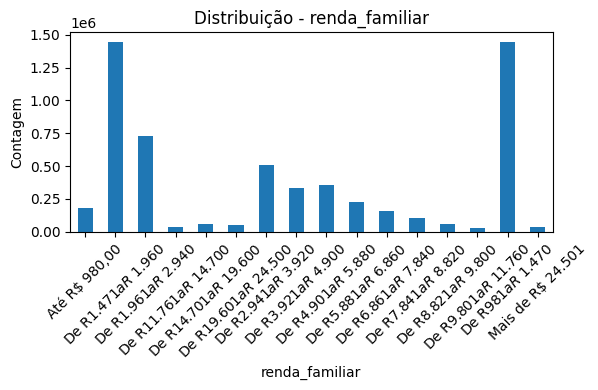

renda_familiar
De R$ 981 a R$ 1.470        0.251
De R$ 1.471 a R$ 1.960      0.250
De R$ 1.961 a R$ 2.940      0.127
De R$ 2.941 a R$ 3.920      0.088
De R$ 4.901 a R$ 5.880      0.061
De R$ 3.921 a R$ 4.900      0.058
De R$ 5.881 a R$ 6.860      0.040
Até R$ 980,00               0.031
De R$ 6.861 a R$ 7.840      0.027
De R$ 7.841 a R$ 8.820      0.018
De R$ 14.701 a R$ 19.600    0.011
De R$ 8.821 a R$ 9.800      0.010
De R$ 19.601 a R$ 24.500    0.009
Mais de R$ 24.501           0.007
De R$ 11.761 a R$ 14.700    0.007
De R$ 9.801 a R$ 11.760     0.006
Name: proportion, dtype: float64

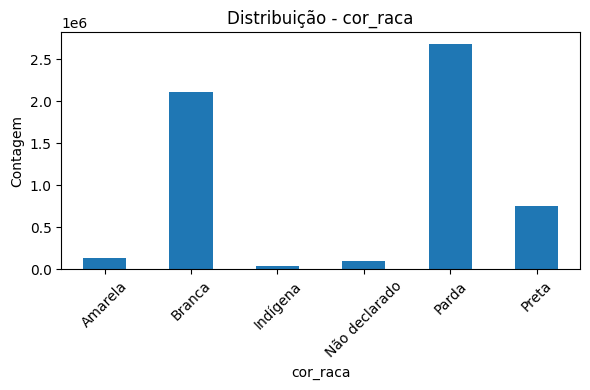

cor_raca
Parda            0.461
Branca           0.362
Preta            0.130
Amarela          0.023
Não declarado    0.018
Indígena         0.006
Name: proportion, dtype: float64

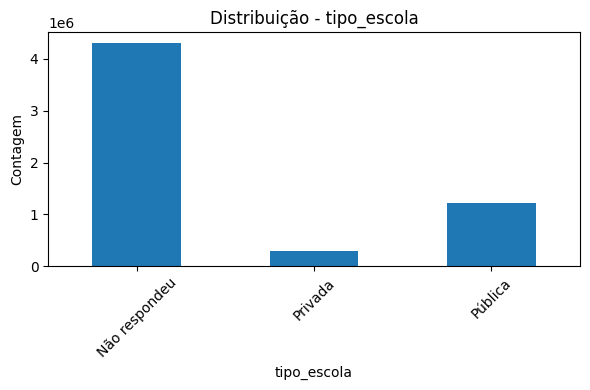

tipo_escola
Não respondeu    0.739
Pública          0.210
Privada          0.052
Name: proportion, dtype: float64

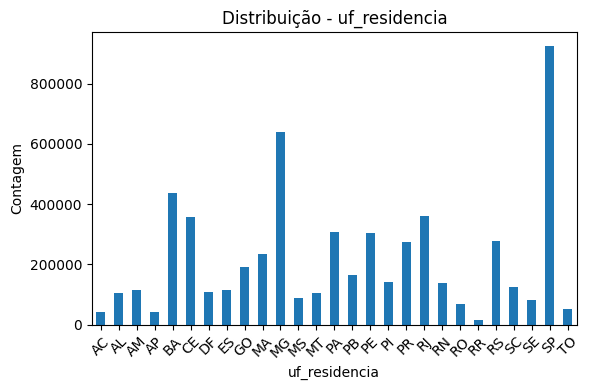

uf_residencia
SP    0.159
MG    0.110
BA    0.075
RJ    0.062
CE    0.062
PA    0.053
PE    0.052
RS    0.048
PR    0.047
MA    0.040
GO    0.033
PB    0.029
PI    0.024
RN    0.024
SC    0.022
AM    0.020
ES    0.020
DF    0.019
AL    0.018
MT    0.018
MS    0.015
SE    0.014
RO    0.012
TO    0.009
AC    0.007
AP    0.007
RR    0.003
Name: proportion, dtype: float64

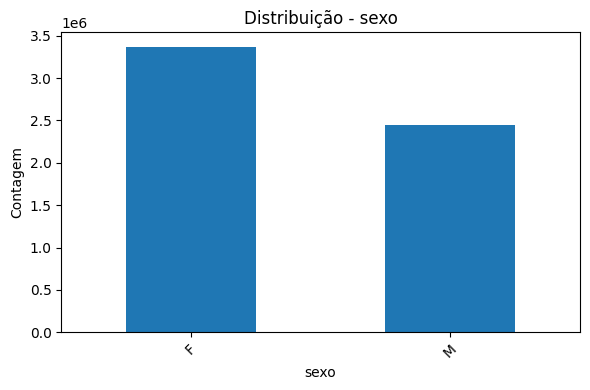

sexo
F    0.58
M    0.42
Name: proportion, dtype: float64

In [9]:
cat_cols = ["renda_familiar", "cor_raca", "tipo_escola", "uf_residencia", "sexo"]

for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        df[col].value_counts().sort_index().plot(kind="bar")
        plt.title(f"Distribuição - {col}")
        plt.xlabel(col)
        plt.ylabel("Contagem")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        display(df[col].value_counts(normalize=True).round(3))


In [10]:
# Criar faixas de Ciências da Natureza
df["faixa_cn"] = pd.cut(
    df["nota_ciencias_natureza"],
    bins=[0, 200, 400, 600, 800, 1000],
    include_lowest=True
)

tabela_g1 = (
    df.groupby("faixa_cn")
      .agg(
          media_cn=("nota_ciencias_natureza", "mean"),
          media_mt=("nota_matematica", "mean"),
          numero_de_alunos=("nota_matematica", "count")
      )
)

tabela_g1.round(2)


C:\Users\Felpi\AppData\Local\Temp\ipykernel_30340\72492099.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("faixa_cn")


,media_cn,media_mt,numero_de_alunos
faixa_cn,,,
"(-0.001, 200.0]",0.00,386.27,1599
"(200.0, 400.0]",385.93,438.86,676041
"(400.0, 600.0]",478.01,481.74,4735603
"(600.0, 800.0]",640.28,677.13,401044
"(800.0, 1000.0]",819.48,875.97,668


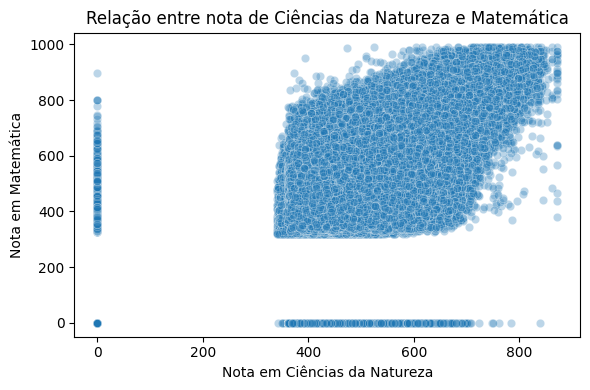

In [11]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df,
    x="nota_ciencias_natureza",
    y="nota_matematica",
    alpha=0.3
)
plt.title("Relação entre nota de Ciências da Natureza e Matemática")
plt.xlabel("Nota em Ciências da Natureza")
plt.ylabel("Nota em Matemática")
plt.tight_layout()
plt.show()


In [ ]:
limite_bom_desempenho = 600
df["mt_alta"] = df["nota_matematica"] >= limite_bom_desempenho

tabela_g2 = (
    df[df["tipo_escola"].isin(["Pública", "Privada"])]
      .groupby("tipo_escola")["mt_alta"]
      .agg(
          perc_aprovados=lambda s: s.mean() * 100,
          numero_de_alunos="count"
      )
      .reset_index()
)

ordem = ["Pública", "Privada"]
tabela_g2["tipo_escola"] = pd.Categorical(
    tabela_g2["tipo_escola"],
    categories=ordem,
    ordered=True
)
tabela_g2 = tabela_g2.sort_values("tipo_escola")

tabela_g2.round(2)


,tipo_escola,perc_aprovados,numero_de_alunos
1,Pública,8.77,1218213
0,Privada,41.84,300008


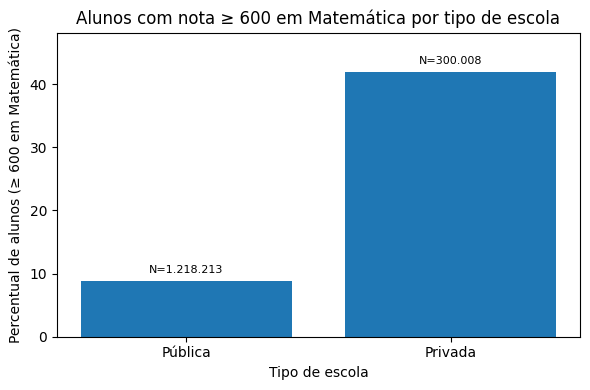

In [ ]:
plt.figure(figsize=(6, 4))
bars = plt.bar(
    tabela_g2["tipo_escola"],
    tabela_g2["perc_aprovados"]
)

plt.title("Alunos com nota ≥ 600 em Matemática por tipo de escola")
plt.xlabel("Tipo de escola")
plt.ylabel("Percentual de alunos (≥ 600 em Matemática)")
plt.ylim(0, tabela_g2["perc_aprovados"].max() * 1.15)

for bar, n in zip(bars, tabela_g2["numero_de_alunos"]):
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        h + 1,
        f"N={n:,}".replace(",", "."),
        ha="center",
        va="bottom",
        fontsize=8
    )

plt.tight_layout()
plt.show()


In [14]:
ordem_renda = [
    "Até R$ 980,00",
    "De R$ 981 a R$ 1.470",
    "De R$ 1.471 a R$ 1.960",
    "De R$ 1.961 a R$ 2.940",
    "De R$ 2.941 a R$ 3.920",
    "De R$ 3.921 a R$ 4.900",
    "De R$ 4.901 a R$ 5.880",
    "De R$ 5.881 a R$ 6.860",
    "De R$ 6.861 a R$ 7.840",
    "De R$ 7.841 a R$ 8.820",
    "De R$ 8.821 a R$ 9.800",
    "De R$ 9.801 a R$ 11.760",
    "De R$ 11.761 a R$ 14.700",
    "De R$ 14.701 a R$ 19.600",
    "De R$ 19.601 a R$ 24.500",
    "Mais de R$ 24.501"
]

df["renda_familiar"] = pd.Categorical(
    df["renda_familiar"],
    categories=ordem_renda,
    ordered=True
)


In [15]:
tabela_g3 = (
    df.groupby("renda_familiar")["nota_redacao"]
      .agg(media="mean", numero_de_alunos="count")
      .reset_index()
)

tabela_g3.round(2)


C:\Users\Felpi\AppData\Local\Temp\ipykernel_30340\1470588413.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("renda_familiar")["nota_redacao"]


,renda_familiar,media,numero_de_alunos
0,"Até R$ 980,00",472.60,179754
1,De R$ 981 a R$ 1.470,484.02,1445506
2,De R$ 1.471 a R$ 1.960,509.46,1440623
3,De R$ 1.961 a R$ 2.940,526.67,732362
4,De R$ 2.941 a R$ 3.920,540.77,508592
5,De R$ 3.921 a R$ 4.900,554.03,331362
6,De R$ 4.901 a R$ 5.880,574.23,353540
7,De R$ 5.881 a R$ 6.860,592.66,229831
8,De R$ 6.861 a R$ 7.840,611.81,157571
9,De R$ 7.841 a R$ 8.820,627.55,102111


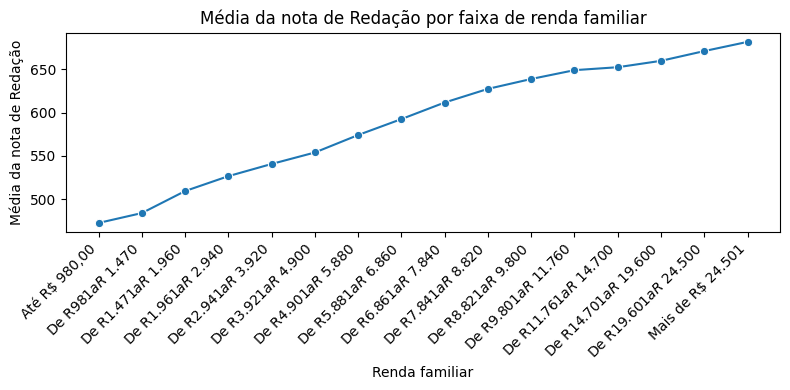

In [16]:
plt.figure(figsize=(8, 4))
sns.lineplot(
    data=tabela_g3,
    x="renda_familiar",
    y="media",
    marker="o"
)
plt.title("Média da nota de Redação por faixa de renda familiar")
plt.xlabel("Renda familiar")
plt.ylabel("Média da nota de Redação")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [20]:
# ============================================
# BLOCO DE MACHINE LEARNING — REGRESSÃO
# Predizer nota_matematica
# ============================================

# 1) IMPORTS DE ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 2) ENGENHARIA DE ATRIBUTOS (CRIAR VERSÃO NUMÉRICA)
df_ml = df.copy()

# a) Sexo (binário)
map_sexo = {"F": 1, "M": 0}
df_ml["sexo_num"] = df_ml["sexo"].map(map_sexo)

# b) Cor/Raça – ordinal simples (você pode ajustar depois se quiser)
map_cor_raca_num = {
    "Não declarado": 0,
    "Amarela": 1,
    "Indígena": 1,
    "Preta": 2,
    "Parda": 3,
    "Branca": 4
}
df_ml["cor_raca_num"] = df_ml["cor_raca"].map(map_cor_raca_num)

# c) Tipo de escola
map_tipo_escola_num = {
    "Pública": 0,
    "Privada": 1,
    "Não respondeu": None
}
df_ml["tipo_escola_num"] = df_ml["tipo_escola"].map(map_tipo_escola_num)

# d) Dependência administrativa
map_dependencia_escola_num = {
    "Federal": 3,
    "Estadual": 2,
    "Municipal": 1,
    "Privada": 4
}
df_ml["dependencia_escola_num"] = df_ml["dependencia_escola"].map(map_dependencia_escola_num)

# e) Escolaridade pai/mãe – ordinal
esc_ord = {
    "Nunca estudou": 0,
    "Não completou o Ensino Fundamental": 1,
    "Completou o Ensino Fundamental": 2,
    "Completou o Ensino Médio": 3,
    "Completou o Ensino Superior": 4,
    "Pós-graduação": 5,
    "Não sei": None
}
df_ml["escolaridade_pai_num"] = df_ml["escolaridade_pai"].map(esc_ord)
df_ml["escolaridade_mae_num"] = df_ml["escolaridade_mae"].map(esc_ord)

# f) Renda familiar – transformar faixa em valor aproximado (R$)
renda_mid = {
    "Até R$ 980,00": 490,
    "De R$ 981 a R$ 1.470": 1226,
    "De R$ 1.471 a R$ 1.960": 1716,
    "De R$ 1.961 a R$ 2.940": 2450,
    "De R$ 2.941 a R$ 3.920": 3430,
    "De R$ 3.921 a R$ 4.900": 4410,
    "De R$ 4.901 a R$ 5.880": 5390,
    "De R$ 5.881 a R$ 6.860": 6370,
    "De R$ 6.861 a R$ 7.840": 7350,
    "De R$ 7.841 a R$ 8.820": 8330,
    "De R$ 8.821 a R$ 9.800": 9310,
    "De R$ 9.801 a R$ 11.760": 10780,
    "De R$ 11.761 a R$ 14.700": 13230,
    "De R$ 14.701 a R$ 19.600": 17150,
    "De R$ 19.601 a R$ 24.500": 22050,
    "Mais de R$ 24.501": 27250
}
df_ml["renda_familiar_num"] = df_ml["renda_familiar"].map(renda_mid)

# 3) DEFINIR FEATURES (X) E ALVO (y)
# alvo: nota de matemática
target_col = "nota_matematica"

feature_cols = [
    "idade",
    "numero_moradores",
    "nota_ciencias_natureza",
    "nota_ciencias_humanas",
    "nota_linguagens",
    "nota_redacao",
    "sexo_num",
    "cor_raca_num",
    "tipo_escola_num",
    "dependencia_escola_num",
    "escolaridade_pai_num",
    "escolaridade_mae_num",
    "renda_familiar_num"
]

# manter apenas linhas sem NaN nestas colunas
cols_modelo = feature_cols + [target_col]
df_model = df_ml[cols_modelo].dropna()

X = df_model[feature_cols]
y = df_model[target_col]

print("Shape usado no modelo:", X.shape)

# 4) TREINO / TESTE + PADRONIZAÇÃO
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# 5) MODELOS (SEU DICIONÁRIO)
modelos = {
    "Regressão Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

resultados = []

for nome, modelo in modelos.items():
    modelo.fit(X_train_s, y_train)
    y_pred = modelo.predict(X_test_s)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    resultados.append({
        "modelo": nome,
        "R2": r2,
        "MAE": mae,
        "RMSE": rmse
    })

resultados_df = pd.DataFrame(resultados)
resultados_df = resultados_df.sort_values("R2", ascending=False)

print("\n=== Resultados dos modelos (predizendo nota_matematica) ===")
print(resultados_df)


Shape usado no modelo: (1196061, 13)

=== Resultados dos modelos (predizendo nota_matematica) ===
             modelo        R2        MAE       RMSE
1     Random Forest  0.466004  57.242294  71.948500
0  Regressão Linear  0.435644  58.859233  73.965501
2               KNN  0.382748  61.166327  77.354208
